In [497]:
import pandas as pd

# STEP 1 : Making data frame of raw data from csv file 
df = pd.read_csv("Bengaluru_House_Data.csv")

# STEP 2 : dropping unessary columns
df = df.drop(["availability", "society", "area_type"], axis = "columns" )

# STEP 3 : dropping rows where any of cell is null(empty)
df = df.dropna()

# STEP 4 : dropping rows where bhk is not mentioned
df.drop(df[df['size'].str.contains('RK')].index, inplace=True)

# STEP 5 : Making new columns of room size excluding unessary text and converting onto int value
df["bhk"] = df['size'].apply(lambda x: int(x.split(" ")[0]))
df = df.drop(["size"], axis = "columns")
df = df.drop(["balcony"], axis = "columns")

# STEP 6 : convertiong range values of squre feet columns into average value of the range (single number) by replacing 
for i in df["total_sqft"]:
    new_val = 0
    if '-' in str(i):
        new_val = ((float(i.split('-')[0]) + float(i.split('-')[1]))/2)
        df["total_sqft"].replace(i, new_val, inplace = True)

# STEP 7 : removing unnessary text and convering area in square feets 
for i in df["total_sqft"]:
    if pd.Series(str(i)).str.contains('[a-zA-Z]').any():
        df = df.drop(df[df['total_sqft'] == i].index)
    

# STEP 8 : converting total_sqft and bhk column into float
df["total_sqft"] = df['total_sqft'].astype('float')
df["bhk"] = df['bhk'].astype('float')


# STEP 9 : adding new column for price per square feet
# df["price_per_sqft"] = (df["price"]*100000 )/df["total_sqft"]


# STEP 10 : Removing irrelevant rows (removing anamolies, outliners based on bhk and total_sqft)

df.drop(df[df["bhk"] > 8 ].index, inplace = True)
df.drop(df[df["total_sqft"] < 460].index, inplace = True)
df.drop(df[df["total_sqft"]/df["bhk"] < 600].index, inplace = True) 
init = 1550
for i in range(1, int(df.bhk.max()) + 1):
    df.drop(df[(df["bhk"] == i) & (df["total_sqft"]/df["bhk"] > init)].index, inplace=True)
    # print(init)
    init -= 77.5
    # init -= 90





# STEP 10 : Removing outliers by using inter quartile method by removing the price values (row) which are
# less than the 25% and greater than 75% of the mean value of the price

# q1 = df[["bhk", "price"]].quantile(0.25)
# q3 = df[["bhk", "price"]].quantile(0.75)
# iqr = q3 - q1


fake_df = df.drop("location", axis = "columns")
grouped_df_price = fake_df.groupby('bhk')

grouped_df_25_price = fake_df.groupby('bhk').quantile(0.15)  #c2
grouped_df_02_price = fake_df.groupby('bhk').quantile(0.25)  #c6
grouped_df_07_price = fake_df.groupby('bhk').quantile(0.25)  #c7
grouped_df_75_price = fake_df.groupby('bhk').quantile(0.85)  #c3
grouped_df_04_price = fake_df.groupby('bhk').quantile(0.15)  #c4
grouped_df_0405_price = fake_df.groupby('bhk').quantile(0.60)  #c5
    # condition2 = df['price'] < int(price25bhk)
    # condition3 = df['price'] > int(price75bhk)
    # condition4 = df['price'] < int(price04bhk)
    # condition5 = df['price'] > int(price0405bhk)
    # condition6 = df['price'] < int(price02bhk)
    # condition7 = df['price'] < int(price07bhk)

# print(grouped_df_5_price)
# print(grouped_df_price.groups.keys())
# print(grouped_df_75_price['price'])
grouped_df_25_price.reset_index(inplace=True)
grouped_df_75_price.reset_index(inplace=True)
grouped_df_04_price.reset_index(inplace=True)
grouped_df_0405_price.reset_index(inplace=True)
grouped_df_02_price.reset_index(inplace=True)
grouped_df_07_price.reset_index(inplace=True)

iqr_price_per_bhk = pd.DataFrame({
    "bhk" : grouped_df_price.groups.keys(),
    "price25" : grouped_df_25_price["price"],
    "price75" : grouped_df_75_price["price"],
    "price04" : grouped_df_04_price["price"],
    "price0405" : grouped_df_0405_price["price"],
    "price02" : grouped_df_02_price["price"],
    "price07" : grouped_df_07_price["price"]
})

# print(iqr_price_per_bhk)
# for i in iqr_price_per_bhk["bhk"]:
# print(df.query("bhk == 2")["price"])
# print(df.query("bhk == 2 & price < 25")["price"])


for i in iqr_price_per_bhk["bhk"]:
    price25bhk = iqr_price_per_bhk.loc[iqr_price_per_bhk["bhk"] == i, 'price25'].iloc[0]
    price75bhk = iqr_price_per_bhk.loc[iqr_price_per_bhk["bhk"] == i, 'price75'].iloc[0]
    price04bhk = iqr_price_per_bhk.loc[iqr_price_per_bhk["bhk"] == i, 'price04'].iloc[0]
    price0405bhk = iqr_price_per_bhk.loc[iqr_price_per_bhk["bhk"] == i, 'price0405'].iloc[0]
    price02bhk = iqr_price_per_bhk.loc[iqr_price_per_bhk["bhk"] == i, 'price02'].iloc[0]
    price07bhk = iqr_price_per_bhk.loc[iqr_price_per_bhk["bhk"] == i, 'price07'].iloc[0]
    
    condition1 = df['bhk'] == i
    condition2 = df['price'] < int(price25bhk)
    condition3 = df['price'] > int(price75bhk)
    condition4 = df['price'] < int(price04bhk)
    condition5 = df['price'] > int(price0405bhk)
    condition6 = df['price'] < int(price02bhk)
    condition7 = df['price'] < int(price07bhk)

    if i < 3:
        df = df.loc[~(condition1 & condition2)]
        df = df.loc[~(condition1 & condition3)]
        
    elif i == 3:
        df = df.loc[~(condition1 & condition6)]
        df = df.loc[~(condition1 & condition5)]
        
    elif i == 4 :
        df = df.loc[~(condition1 & condition2)]
        df = df.loc[~(condition1 & condition5)]
        
    elif i == 5:
        df = df.loc[~(condition1 & condition7)]
        df = df.loc[~(condition1 & condition5)]
    else:
        df = df.loc[~(condition1 & condition7)]
        df = df.loc[~(condition1 & condition5)]
        


# STEP 11 : Finding anamolies in location before encoding (converting location name into "other" if it is occuring less than 10 times)
df.location = df.location.apply(lambda x: x.strip())     # Removing leading and trailing spaces
df.location = df.location.apply(lambda x: x.lower())

location_group= df.groupby("location")["location"].count()
location_group_lessthan10 = location_group[location_group<10]
df["location"] = df["location"].apply(lambda x: "other" if x in location_group_lessthan10 else x)


# STEP 12 : encoding loaction name using one_hot_encoding technique
dummy = pd.get_dummies(df["location"])
dummy.replace({
    True: 1,
    False: 0
}, inplace = True)
dummy

# STEP 13 : Concating encoded data frame of location and original df and also removing previous location column
df = pd.concat([df.drop(["location"], axis = "columns"), dummy], axis = "columns")


# STEP 14 : Calculating prformance of various machine learning models
from sklearn.model_selection import cross_val_score, KFold
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
# from sklearn.linear_model import LogisticRegression
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.svm import SVC
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.naive_bayes import GaussianNB

# x = df.drop(["price", "price_per_sqft"], axis = "columns")
x = df.drop("price", axis = "columns")
y = df["price"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.1)

kf = KFold(n_splits=5)

# Use cross_val_score to get cross-validated scores
cv_scores = cross_val_score(LinearRegression(), x_train, y_train, cv=kf)
print(cv_scores.mean())

model = LinearRegression()
trained_model = model.fit(x, y)

# STEP 14 : Storing model in 
import pickle
with open ("pickle_model", "wb") as f:
    pickle.dump(trained_model, f)

# STEP 14 : Storing columns in JSON file
import json
columns = {
    "data_columns" : list(x.columns)
}
with open ("columns.json", "w")as f:
    f.write(json.dumps(columns))



# ------------ My function for performance -------------

# def score(ml_model, x, y):
#     model = ml_model
#     model.fit(x, y)  
#     return model, model.score(x, y)
# print(score(LinearRegression(), x_test, y_test))
df

0.8841668904745449


,total_sqft,bath,price,bhk,5th phase jp nagar,7th phase jp nagar,akshaya nagar,ambedkar nagar,balagere,banashankari,...,sarjapur road,talaghattapura,tc palaya,thanisandra,thigalarapalya,uttarahalli,vittasandra,whitefield,yelahanka,yeshwanthpur
4,1200.0,2.0,51.0,2.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11,2785.0,5.0,295.0,4.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
14,2250.0,3.0,148.0,3.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
30,2475.0,4.0,186.0,4.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
42,600.0,1.0,38.0,1.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13289,1349.0,2.0,96.8,2.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13291,812.0,1.0,26.0,1.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13293,2425.0,5.0,195.0,4.0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
13307,1805.0,3.0,134.0,3.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [487]:
loc_cols = []

for i in range (4, len(df.columns)):
    loc_cols.append(df.columns[i])

# column_names = pd.DataFrame({
#     "columns_names" : loc_cols,
#     "index" : indexing
# })
# column_names
# total_sqft, bath, balcony, price, bhk, location

def set_input(total_sqft, bath, bhk, location):
    
    li = []
    
    li.append(total_sqft)
    li.append(bath)
    li.append(bhk)
    
    for i in loc_cols:
        if i == location:
            li.append(1)
        else:
            li.append(0)
    return li

inputs = set_input(3000, 2, 4, "akshaya nagar")

with open("pickle_model", "rb") as f:
    ml = pickle.load(f)

ml.predict([inputs])


C:\Users\prith\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([178.86152661])

(0.0, 10.0)

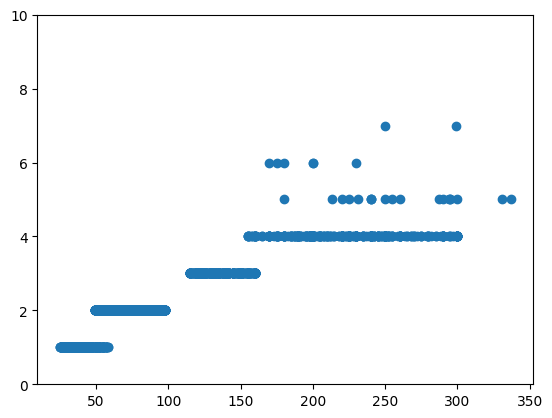

In [475]:
import matplotlib.pyplot as plt
plt.scatter(df['price'], df['bhk'])
plt.ylim(0, 10)
# plt.xlim(600, 10000)

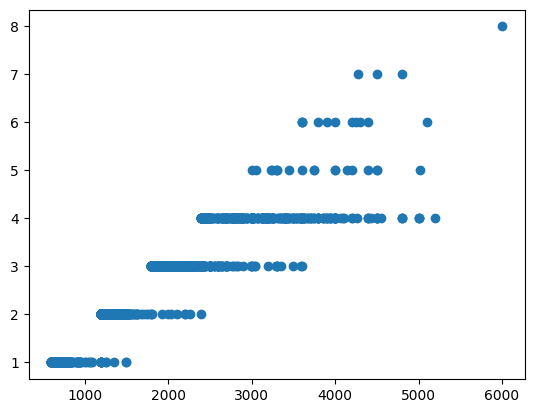

In [409]:
plt.scatter(df['total_sqft'], df['bhk'])
# plt.ylim(0, 10)
# plt.xlim(600, 10000)